In [ ]:
from google.colab import drive
  
# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
data_file_name ="/content/drive/MyDrive/Colab Notebooks/CVision/FinalProject_part1_dataset.csv"
dataset = pd.read_csv(data_file_name)

In [ ]:
!pip install tqdm

from tqdm import tqdm_notebook as tqdm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# tokenizing the comments
def preprocessing_content(X):
  documents = []
  lemmatizer= WordNetLemmatizer()
  stemmer= PorterStemmer()
  stop_words = set(stopwords.words('english'))
  for sen in range(0, len(X)):
      # Remove all the special characters
      document = re.sub(r'\W', ' ', str(X[sen]))
      
      # remove all single characters
      document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
      
      # Remove single characters from the start
      document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
      
      # Substituting multiple spaces with single space
      document = re.sub(r'\s+', ' ', document, flags=re.I)
      
      # Removing prefixed 'b'
      document = re.sub(r'^b\s+', '', document)
      
      # Converting to Lowercase
      document = document.lower()
      
      document = word_tokenize(document)

      #stopword
      document = [i for i in document if not i in stop_words]
      
      documents.append(document)
  print(documents)
  return documents


In [ ]:
processed_text = preprocessing_content(dataset['content'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# making tfidf from the comments
'''Term Frequency-Inverse Document Frequency is a numerical statistic that demonstrates how important a word is to a corpus.
Term Frequency is just ratio number of current word to the number of all words in document/string/etc. 
Inverse Document Frequency is a log of the ratio of the number of all documents/string in the corpus to the number of documents with term t_i. 
tf-idf(t, d, D) is the product tf(t, d) to idf(t, D).'''
def dummy_fun(doc):
    return doc
def tfidf(data, ma = 0.6, mi = 0.0001):
    tfidf_vectorize = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None,
    max_df = ma,
    min_df = mi) 
    tfidf_data = tfidf_vectorize.fit_transform(data)
    return tfidf_vectorize,tfidf_data

In [ ]:
tfidf_vectorize,word_embedded_text = tfidf(processed_text)
print(word_embedded_text.shape)

(16488, 8127)


k-means with library

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

1
2
3
4
5
6
7
8
9


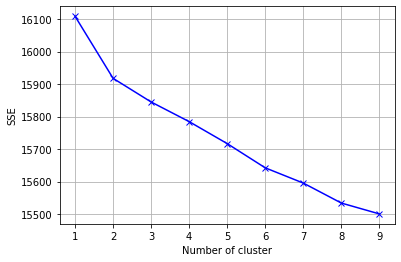

In [ ]:
sse = {}
for k in range(1, 10):
    print(k)
    kmeans = KMeans(n_clusters=k, max_iter=500).fit(word_embedded_text)
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

In [ ]:
# finding the cluster of an example
kmeans = KMeans(n_clusters=2, max_iter=500).fit(word_embedded_text)

Y = tfidf_vectorize.transform(["The game was really fun. I really liked it!"])
prediction = kmeans.predict(Y)
print(prediction)


[0]
